## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.329538 -1.439593  0.382410  1.030991  1.307443 -0.259368
1  0.198730 -1.424852  0.003581 -1.570825  0.193402 -1.951035
2 -0.606912 -0.481349 -0.773812 -1.603471  1.300723 -0.925971
3 -1.183627 -0.666066  0.416150 -0.117692  1.507471 -0.606746
4  0.671167  0.996395  0.614405 -1.427038 -1.604816 -0.583033


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9676078	total: 68.2ms	remaining: 1m 8s
1:	learn: 0.9585094	total: 68.8ms	remaining: 34.3s
2:	learn: 0.9484760	total: 69.5ms	remaining: 23.1s
3:	learn: 0.9381444	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9296626	total: 70.8ms	remaining: 14.1s
5:	learn: 0.9202544	total: 71.3ms	remaining: 11.8s
6:	learn: 0.9106918	total: 71.8ms	remaining: 10.2s
7:	learn: 0.9034015	total: 72.5ms	remaining: 8.99s
8:	learn: 0.8944698	total: 73.1ms	remaining: 8.04s
9:	learn: 0.8852825	total: 73.5ms	remaining: 7.28s
10:	learn: 0.8783498	total: 73.9ms	remaining: 6.65s
11:	learn: 0.8688022	total: 74.3ms	remaining: 6.12s
12:	learn: 0.8594068	total: 74.8ms	remaining: 5.68s
13:	learn: 0.8501191	total: 75.1ms	remaining: 5.29s
14:	learn: 0.8429888	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8354477	total: 75.9ms	remaining: 4.67s
16:	learn: 0.8284727	total: 76.2ms	remaining: 4.41s
17:	learn: 0.8203043	total: 76.6ms	remaining: 4.18s
18:	learn: 0.8126014	total: 76.9ms	remaining

79:	learn: 0.4792534	total: 105ms	remaining: 1.2s
80:	learn: 0.4755744	total: 105ms	remaining: 1.2s
81:	learn: 0.4719439	total: 106ms	remaining: 1.19s
82:	learn: 0.4683947	total: 106ms	remaining: 1.18s
83:	learn: 0.4639737	total: 107ms	remaining: 1.16s
84:	learn: 0.4600385	total: 107ms	remaining: 1.15s
85:	learn: 0.4563394	total: 108ms	remaining: 1.15s
86:	learn: 0.4522691	total: 108ms	remaining: 1.13s
87:	learn: 0.4494097	total: 108ms	remaining: 1.12s
88:	learn: 0.4459648	total: 109ms	remaining: 1.11s
89:	learn: 0.4425330	total: 109ms	remaining: 1.1s
90:	learn: 0.4403228	total: 110ms	remaining: 1.1s
91:	learn: 0.4371339	total: 110ms	remaining: 1.09s
92:	learn: 0.4334788	total: 111ms	remaining: 1.08s
93:	learn: 0.4304580	total: 111ms	remaining: 1.07s
94:	learn: 0.4267330	total: 111ms	remaining: 1.06s
95:	learn: 0.4236078	total: 112ms	remaining: 1.05s
96:	learn: 0.4199511	total: 112ms	remaining: 1.04s
97:	learn: 0.4172983	total: 113ms	remaining: 1.04s
98:	learn: 0.4143328	total: 113ms	r

225:	learn: 0.1717311	total: 170ms	remaining: 584ms
226:	learn: 0.1705379	total: 171ms	remaining: 582ms
227:	learn: 0.1692909	total: 171ms	remaining: 580ms
228:	learn: 0.1681308	total: 172ms	remaining: 578ms
229:	learn: 0.1670989	total: 172ms	remaining: 576ms
230:	learn: 0.1658485	total: 173ms	remaining: 575ms
231:	learn: 0.1648239	total: 173ms	remaining: 573ms
232:	learn: 0.1636676	total: 174ms	remaining: 572ms
233:	learn: 0.1627018	total: 174ms	remaining: 570ms
234:	learn: 0.1616617	total: 175ms	remaining: 569ms
235:	learn: 0.1604596	total: 175ms	remaining: 567ms
236:	learn: 0.1595701	total: 176ms	remaining: 565ms
237:	learn: 0.1584660	total: 176ms	remaining: 564ms
238:	learn: 0.1574420	total: 177ms	remaining: 562ms
239:	learn: 0.1564076	total: 177ms	remaining: 561ms
240:	learn: 0.1554797	total: 178ms	remaining: 560ms
241:	learn: 0.1547837	total: 178ms	remaining: 558ms
242:	learn: 0.1540484	total: 179ms	remaining: 557ms
243:	learn: 0.1532166	total: 179ms	remaining: 555ms
244:	learn: 

439:	learn: 0.0590688	total: 272ms	remaining: 346ms
440:	learn: 0.0587959	total: 272ms	remaining: 345ms
441:	learn: 0.0586158	total: 273ms	remaining: 344ms
442:	learn: 0.0583118	total: 273ms	remaining: 344ms
443:	learn: 0.0580480	total: 274ms	remaining: 343ms
444:	learn: 0.0578570	total: 274ms	remaining: 342ms
445:	learn: 0.0576824	total: 275ms	remaining: 341ms
446:	learn: 0.0575096	total: 275ms	remaining: 341ms
447:	learn: 0.0573407	total: 276ms	remaining: 340ms
448:	learn: 0.0570440	total: 276ms	remaining: 339ms
449:	learn: 0.0568564	total: 277ms	remaining: 338ms
450:	learn: 0.0566806	total: 278ms	remaining: 338ms
451:	learn: 0.0565001	total: 278ms	remaining: 337ms
452:	learn: 0.0562270	total: 279ms	remaining: 336ms
453:	learn: 0.0559372	total: 279ms	remaining: 336ms
454:	learn: 0.0558023	total: 279ms	remaining: 335ms
455:	learn: 0.0556500	total: 280ms	remaining: 334ms
456:	learn: 0.0555289	total: 280ms	remaining: 333ms
457:	learn: 0.0553716	total: 281ms	remaining: 333ms
458:	learn: 

603:	learn: 0.0275018	total: 353ms	remaining: 232ms
604:	learn: 0.0273505	total: 354ms	remaining: 231ms
605:	learn: 0.0271907	total: 354ms	remaining: 230ms
606:	learn: 0.0270447	total: 355ms	remaining: 230ms
607:	learn: 0.0268751	total: 355ms	remaining: 229ms
608:	learn: 0.0267059	total: 356ms	remaining: 228ms
609:	learn: 0.0265659	total: 356ms	remaining: 228ms
610:	learn: 0.0264028	total: 357ms	remaining: 227ms
611:	learn: 0.0262565	total: 357ms	remaining: 226ms
612:	learn: 0.0261075	total: 358ms	remaining: 226ms
613:	learn: 0.0259646	total: 358ms	remaining: 225ms
614:	learn: 0.0258334	total: 358ms	remaining: 224ms
615:	learn: 0.0256814	total: 359ms	remaining: 224ms
616:	learn: 0.0255410	total: 359ms	remaining: 223ms
617:	learn: 0.0254151	total: 360ms	remaining: 222ms
618:	learn: 0.0252687	total: 360ms	remaining: 222ms
619:	learn: 0.0251380	total: 361ms	remaining: 221ms
620:	learn: 0.0250177	total: 361ms	remaining: 220ms
621:	learn: 0.0249161	total: 361ms	remaining: 220ms
622:	learn: 

817:	learn: 0.0121651	total: 455ms	remaining: 101ms
818:	learn: 0.0121169	total: 455ms	remaining: 101ms
819:	learn: 0.0120696	total: 456ms	remaining: 100ms
820:	learn: 0.0120394	total: 456ms	remaining: 99.5ms
821:	learn: 0.0119871	total: 457ms	remaining: 98.9ms
822:	learn: 0.0119634	total: 457ms	remaining: 98.4ms
823:	learn: 0.0119204	total: 458ms	remaining: 97.8ms
824:	learn: 0.0118938	total: 458ms	remaining: 97.2ms
825:	learn: 0.0118522	total: 459ms	remaining: 96.6ms
826:	learn: 0.0118017	total: 459ms	remaining: 96.1ms
827:	learn: 0.0117513	total: 460ms	remaining: 95.5ms
828:	learn: 0.0117020	total: 460ms	remaining: 94.9ms
829:	learn: 0.0116769	total: 461ms	remaining: 94.4ms
830:	learn: 0.0116283	total: 461ms	remaining: 93.8ms
831:	learn: 0.0116036	total: 461ms	remaining: 93.2ms
832:	learn: 0.0115792	total: 462ms	remaining: 92.6ms
833:	learn: 0.0115474	total: 462ms	remaining: 92ms
834:	learn: 0.0115043	total: 464ms	remaining: 91.6ms
835:	learn: 0.0114564	total: 464ms	remaining: 91ms


986:	learn: 0.0072141	total: 537ms	remaining: 7.07ms
987:	learn: 0.0072007	total: 537ms	remaining: 6.52ms
988:	learn: 0.0071646	total: 538ms	remaining: 5.98ms
989:	learn: 0.0071482	total: 538ms	remaining: 5.43ms
990:	learn: 0.0071352	total: 538ms	remaining: 4.89ms
991:	learn: 0.0070946	total: 539ms	remaining: 4.35ms
992:	learn: 0.0070836	total: 540ms	remaining: 3.8ms
993:	learn: 0.0070728	total: 540ms	remaining: 3.26ms
994:	learn: 0.0070568	total: 541ms	remaining: 2.72ms
995:	learn: 0.0070462	total: 542ms	remaining: 2.18ms
996:	learn: 0.0070310	total: 542ms	remaining: 1.63ms
997:	learn: 0.0070163	total: 543ms	remaining: 1.09ms
998:	learn: 0.0069931	total: 543ms	remaining: 543us
999:	learn: 0.0069702	total: 544ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

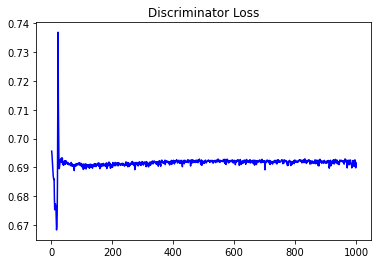

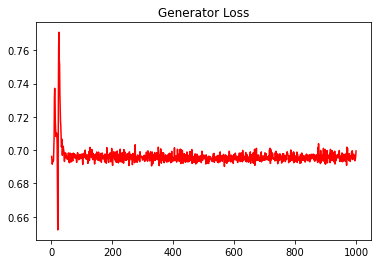

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.027110186397730197


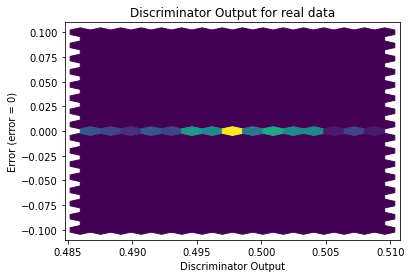

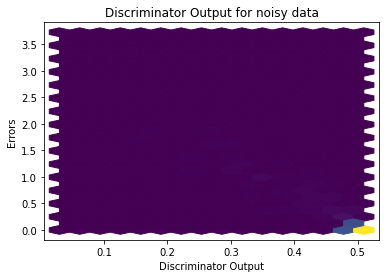

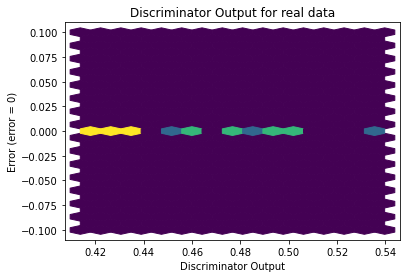

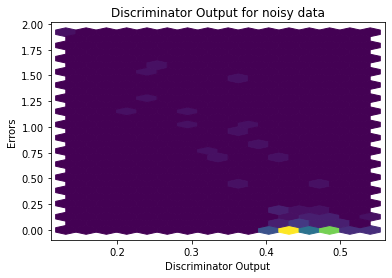

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


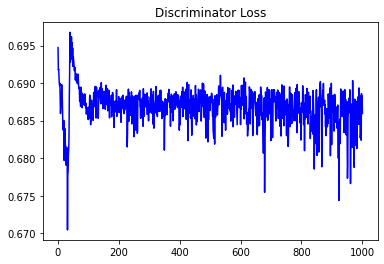

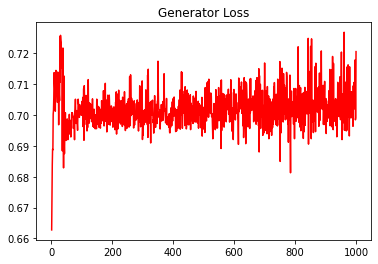

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04112370244228733


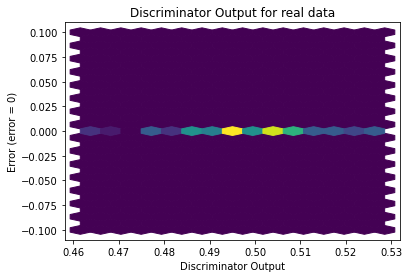

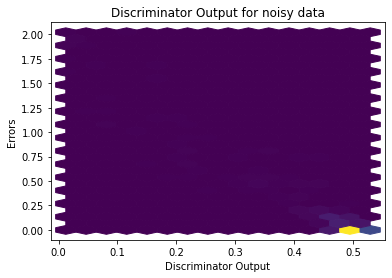

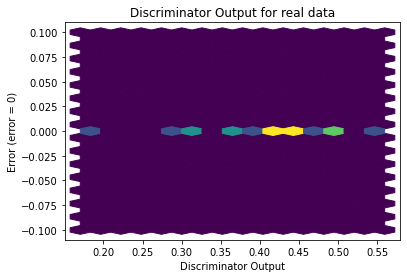

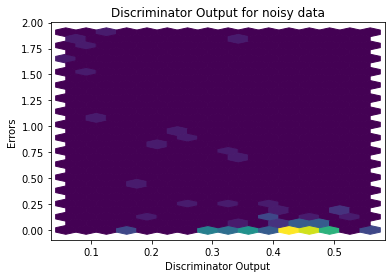

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1764]], requires_grad=True)
